In [4]:
from logging import warning
import numpy as np
import pandas as pd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("c:/Users/ELCOT/downloads/collegePlace.csv")

In [7]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [9]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [10]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

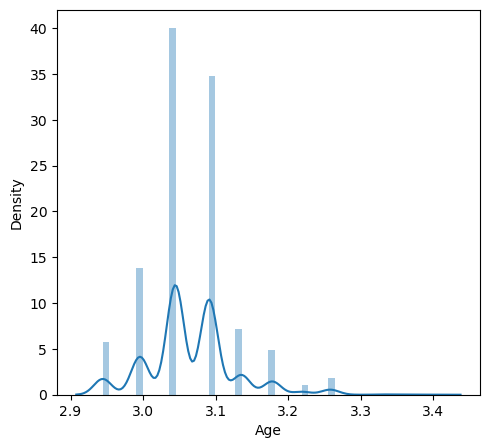

In [11]:
transformationplot(np.log(df['Age']))

In [12]:
df=df.replace(['male'],[0])
df=df.replace(['female'],[1])

In [13]:
df=df.replace(['ComputerScience','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [14]:
df=df.drop(['Hostel'],axis=1)

In [15]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,2,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,1,1,6,0,1
3,21,Male,1,0,8,1,1
4,22,Male,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,1,0,7,0,0
2962,23,Male,3,1,7,0,0
2963,22,Male,1,1,7,0,0
2964,22,Male,Computer Science,1,7,0,0


<Axes: xlabel='CGPA', ylabel='Density'>

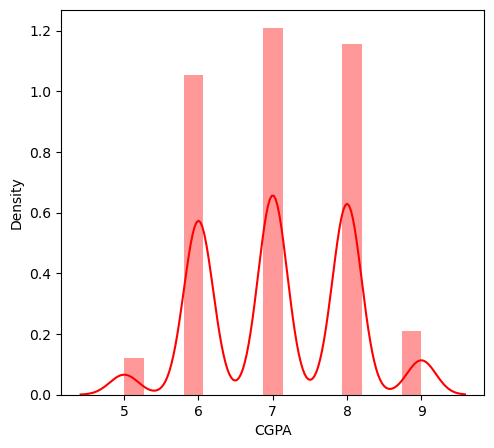

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

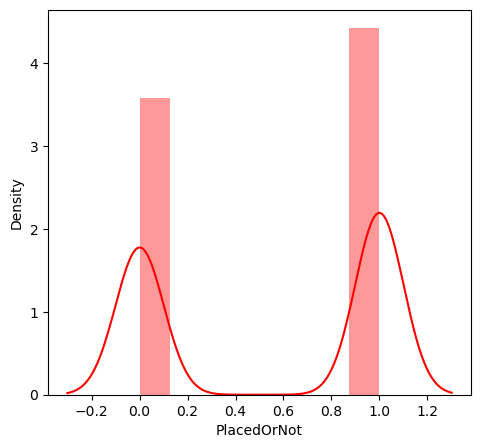

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

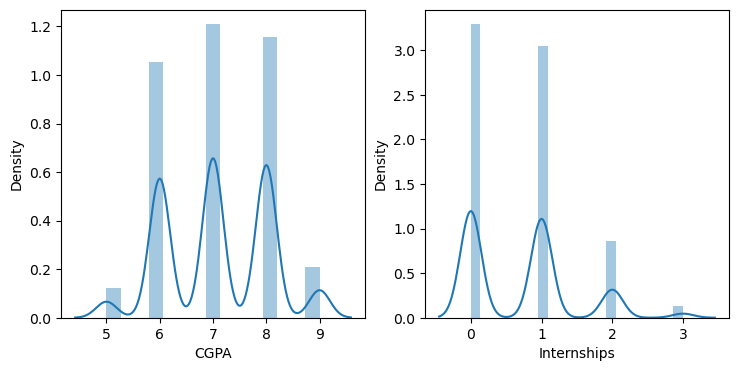

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.distplot(df['CGPA'])
plt.subplot(1,4,2)
sns.distplot(df['Internships'])
plt.show()


<Axes: xlabel='PlacedOrNot', ylabel='count'>

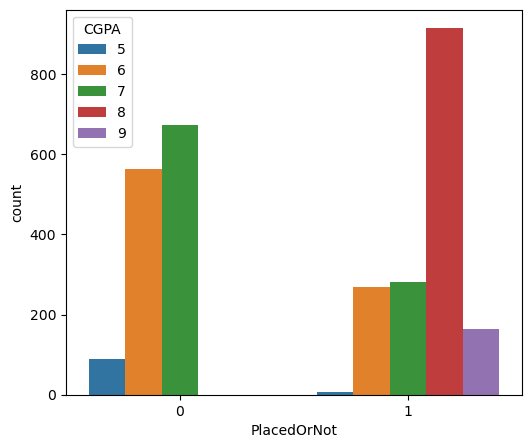

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data=df,x="PlacedOrNot",hue='CGPA')

<Axes: xlabel='PlacedOrNot', ylabel='count'>

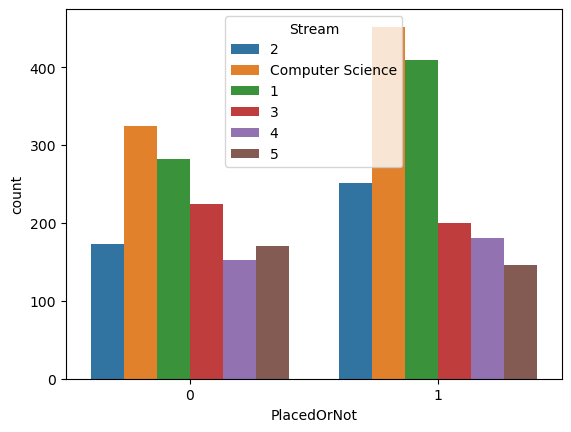

In [20]:
sns.countplot(data=df,x='PlacedOrNot',hue='Stream')

In [21]:
x=df.iloc[:,[3,4]]
y=df.iloc[:,6]

In [22]:
x.head()

,Internships,CGPA
0,1,8
1,0,7
2,1,6
3,0,8
4,0,8


In [23]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: PlacedOrNot, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [25]:
classifier=svm.SVC()

In [26]:
classifier.fit(x_train,y_train)

SVC()

In [27]:
x_train_predict=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)

In [28]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.845699831365936


In [29]:
print(confusion_matrix(x_train_predict,y_train))
print(classification_report(y_train,x_train_predict))

[[ 998  303]
 [  63 1008]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1061
           1       0.94      0.77      0.85      1311

    accuracy                           0.85      2372
   macro avg       0.85      0.85      0.85      2372
weighted avg       0.86      0.85      0.85      2372



In [30]:
import pickle


In [31]:
filename = 'placement1.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [32]:
pickle.dump(classifier,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))